In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob
from tensorflow.keras import layers, models
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import VGG16, ResNet50
from tensorflow.keras.optimizers import SGD, Adam
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

[INFO] 0/130 processesd
[INFO] 10/130 processesd
[INFO] 20/130 processesd
[INFO] 30/130 processesd
[INFO] 40/130 processesd
[INFO] 50/130 processesd
[INFO] 60/130 processesd
[INFO] 70/130 processesd
[INFO] 80/130 processesd
[INFO] 90/130 processesd
[INFO] 100/130 processesd
[INFO] 110/130 processesd
[INFO] 120/130 processesd
Epoch 1/40
12/12 [==============================] - 3s 162ms/step - loss: 0.7271 - accuracy: 0.5484 - val_loss: 0.6984 - val_accuracy: 0.4839
Epoch 2/40
12/12 [==============================] - 2s 144ms/step - loss: 0.6742 - accuracy: 0.5161 - val_loss: 0.6850 - val_accuracy: 0.4839
Epoch 3/40
12/12 [==============================] - 2s 144ms/step - loss: 0.6886 - accuracy: 0.6129 - val_loss: 0.6553 - val_accuracy: 0.6452
Epoch 4/40
12/12 [==============================] - 2s 145ms/step - loss: 0.6162 - accuracy: 0.6559 - val_loss: 0.6498 - val_accuracy: 0.6452
Epoch 5/40
12/12 [==============================] - 2s 145ms/step - loss: 0.5238 - accuracy: 0.7527 - val

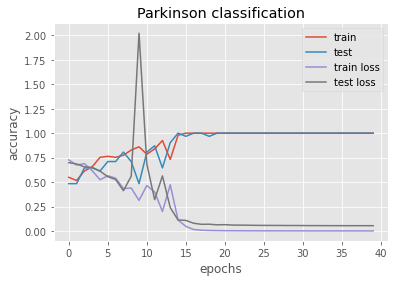

In [31]:
data=[]
labels=[]

for i, item in enumerate(glob.glob("/content/drive/MyDrive/parkinson-new//*//*")):
    img=cv2.imread(item)
    r_img=cv2.resize(img,(224,224))
    data.append(r_img)
    label=item.split("/")[-2]
    labels.append(label)
    if i % 10 ==0:
      print("[INFO] {}/130 processesd".format(i))
data = np.array(data)/255
le = LabelEncoder()
labels=le.fit_transform(labels)
labels=to_categorical(labels)


X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.25)
baseModel=VGG16(include_top= False,
                weights="imagenet",
                input_tensor=layers.Input(shape=(224,224,3)))
net=models.Sequential([baseModel,
                      layers.MaxPool2D(pool_size=(4,4)),
                       layers.Flatten(),
                       layers.Dense(64,activation="relu"),
                      layers.Dense(2,activation="softmax")
                      ])
#for layer in baseModel.layers:
 # layer.trainable= False
opt=SGD(learning_rate=0.01,
        decay=0.01/10,
        )
net.compile(optimizer=opt,
            loss="binary_crossentropy",
            metrics=["accuracy"])
H=net.fit(X_train,y_train,epochs = 40, batch_size= 8,validation_data = (X_test,y_test))
plt.style.use("ggplot")
plt.plot(H.history["accuracy"],label="train")
plt.plot(H.history["val_accuracy"],label="test")
plt.plot(H.history["loss"],label="train loss")
plt.plot(H.history["val_loss"],label="test loss")
plt.legend()
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.title("Parkinson classification")
plt.show()





In [ ]:
print(label)

/content/drive/MyDrive/parkinson/HC/HCteta_8.png


In [32]:
net.summary()

Model: "sequential_26"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 7, 7, 512)         14714688  
_________________________________________________________________
max_pooling2d_19 (MaxPooling (None, 1, 1, 512)         0         
_________________________________________________________________
flatten_19 (Flatten)         (None, 512)               0         
_________________________________________________________________
dense_52 (Dense)             (None, 64)                32832     
_________________________________________________________________
dense_53 (Dense)             (None, 2)                 130       
Total params: 14,747,650
Trainable params: 14,747,650
Non-trainable params: 0
_________________________________________________________________


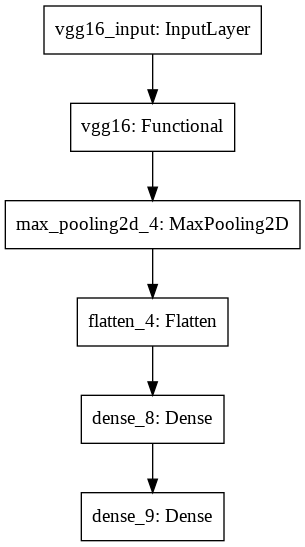

In [ ]:
from tensorflow.keras.utils import plot_model
plot_model(net)

In [33]:
net.save("nethundred.h5")

In [36]:
np.save("X_train",X_train)